<a href="https://colab.research.google.com/github/supraboy/project-3/blob/main/kraggle_dataset_ml_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive
'''
#Navigate to /mydrive/sp2
%cd drive/MyDrive/sp2

df = pd.read_csv('interpolated_sensor.csv')

df

/content/drive/MyDrive/sp2


,index,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,1/4/2018 00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,1/4/2018 00:01,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,1/4/2018 00:02,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,1/4/2018 00:03,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,1/4/2018 00:04,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,31/8/2018 23:55,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1000.0000,231.1921,NORMAL
220316,220316,31/8/2018 23:56,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1000.0000,231.1921,NORMAL
220317,220317,31/8/2018 23:57,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1000.0000,232.0602,NORMAL
220318,220318,31/8/2018 23:58,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,1000.0000,234.0856,NORMAL


In [ ]:
df.index = df.pop('index')
df.index = df.pop('timestamp')
df


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
1/4/2018 00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1/4/2018 00:01,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1/4/2018 00:02,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
1/4/2018 00:03,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
1/4/2018 00:04,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/8/2018 23:55,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1000.0000,231.1921,NORMAL
31/8/2018 23:56,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1000.0000,231.1921,NORMAL
31/8/2018 23:57,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1000.0000,232.0602,NORMAL


In [ ]:
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')
df[:26]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.21180,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.21180,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.21180,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.16840,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.21180,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
2018-04-01 00:05:00,2.453588,47.09201,53.16840,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,15.16204,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
2018-04-01 00:06:00,2.455556,47.04861,53.16840,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,15.08247,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL
2018-04-01 00:07:00,2.449653,47.13541,53.16840,46.397568,630.6713,75.77331,13.25231,16.12413,16.19647,15.08247,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL
2018-04-01 00:08:00,2.463426,47.09201,53.16840,46.397568,631.9444,74.58916,13.28848,16.13136,15.47309,15.11863,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL


# attribute selection, for now only 1 attribute is selected (sensor_01 called as temp)

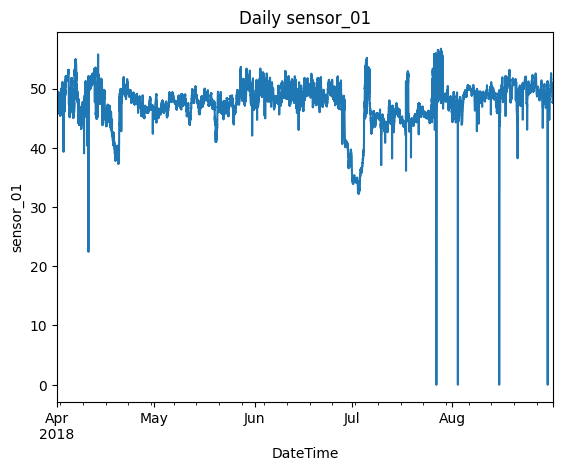

In [ ]:
temp = df['sensor_01']

# Resample the data at a daily frequency, taking the mean of the values for each day
#temp_resampled = temp.resample('D').mean()

# Plot the resampled data
#temp_resampled.plot()
temp.plot()

# Customize the plot if needed
plt.title('Daily sensor_01')
plt.xlabel('DateTime')
#plt.ylabel('sensor_01')plt.title('Daily sensor_01')
plt.xlabel('DateTime')
plt.ylabel('sensor_01')
plt.show()
plt.show()

In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        # Extract a window of rows as input features
        window_rows = df_as_np[i:i + window_size]
        X.append(window_rows)

        # Extract the label for the next time step
        label = df_as_np[i + window_size]
        y.append(label)

    return np.array(X), np.array(y)


In [ ]:
df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1000.0000,231.1921,NORMAL
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1000.0000,231.1921,NORMAL
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1000.0000,232.0602,NORMAL


In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        # Extract a window of rows as input features
        window_rows = df_as_np[i:i + window_size]
        X.append(window_rows)

        # Extract the label for the next time step
        label = df_as_np[i + window_size]
        y.append(label)

    return np.array(X), np.array(y)

WINDOW_SIZE = 10
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((220310, 10), (220310,))

In [ ]:
y1

array([47.48264   , 47.91666   , 48.26389   , ..., 47.69964981,
       47.69964981, 47.69964981])

In [ ]:
1# Assuming you have at least 220315 samples in total
X_train1, y_train1 = X1[:200000], y1[:200000]
X_val1, y_val1 = X1[200000:220315], y1[200000:220315]
X_test1, y_test1 = X1[220315:], y1[220315:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((200000, 10), (200000,), (20310, 10), (20310,), (0, 10), (0,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Create a sequential model
model1 = Sequential()

# Add an input layer with input shape (WINDOW_SIZE, X_train1.shape[1])
model1.add(InputLayer((WINDOW_SIZE, 1)))

# Add a bidirectional LSTM layer with 64 units
model1.add(Bidirectional(LSTM(32)))

# Add a Dense layer with 8 units and ReLU activation
model1.add(Dense(8, activation='relu'))

# Add a Dense layer with 1 unit and linear activation (no activation function)
model1.add(Dense(1, activation='linear'))

# Print the model summary
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9233 (36.07 KB)
Trainable params: 9233 (36.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
history1 = model1.fit(X_train1, y_train1, epochs=5, batch_size=32, validation_data=(X_val1, y_val1), callbacks=[cp1], verbose=2)

Epoch 1/5
6250/6250 - 46s - loss: 323.1631 - root_mean_squared_error: 17.9767 - val_loss: 0.3431 - val_root_mean_squared_error: 0.5857 - 46s/epoch - 7ms/step
Epoch 2/5
6250/6250 - 40s - loss: 0.1625 - root_mean_squared_error: 0.4031 - val_loss: 0.1464 - val_root_mean_squared_error: 0.3827 - 40s/epoch - 6ms/step
Epoch 3/5
6250/6250 - 31s - loss: 0.1062 - root_mean_squared_error: 0.3259 - val_loss: 0.1505 - val_root_mean_squared_error: 0.3879 - 31s/epoch - 5ms/step
Epoch 4/5
6250/6250 - 30s - loss: 0.0928 - root_mean_squared_error: 0.3046 - val_loss: 0.2039 - val_root_mean_squared_error: 0.4515 - 30s/epoch - 5ms/step
Epoch 5/5
6250/6250 - 30s - loss: 0.0860 - root_mean_squared_error: 0.2932 - val_loss: 0.1511 - val_root_mean_squared_error: 0.3887 - 30s/epoch - 5ms/step


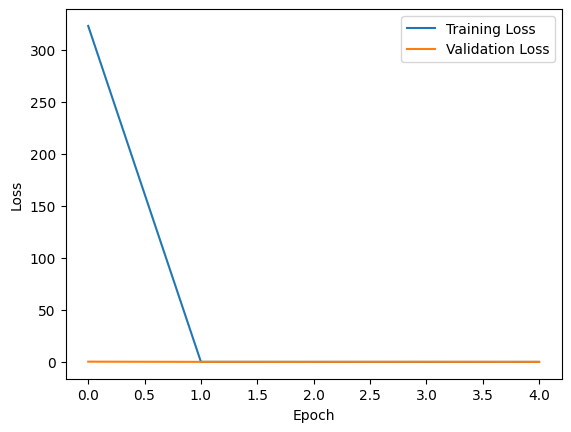

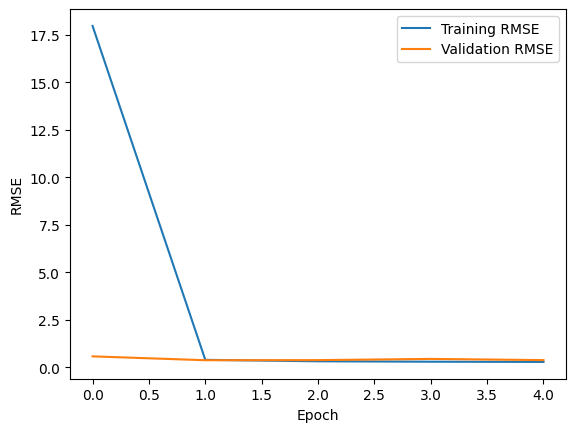

In [ ]:
# Plot training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation RMSE
plt.plot(history1.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history1.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model1 = load_model('model1/')
model1.save_weights('my_model1.weights')

# Print the model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9233 (36.07 KB)
Trainable params: 9233 (36.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# --load saved trained weights to model1

In [ ]:
model1.load_weights('my_model1.weights')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9233 (36.07 KB)
Trainable params: 9233 (36.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_predictions = []
train_predictions

[]

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions1':train_predictions, 'Actuals':y_train1})
train_results

6250/6250 [==============================] - 21s 3ms/step


,Train Predictions1,Actuals
0,47.199471,47.48264
1,47.278496,47.91666
2,47.427124,48.26389
3,47.551682,48.43750
4,47.687103,48.56771
...,...,...
199995,50.032043,50.00000
199996,50.023888,50.00000
199997,50.015488,50.00000
199998,50.006882,50.00000


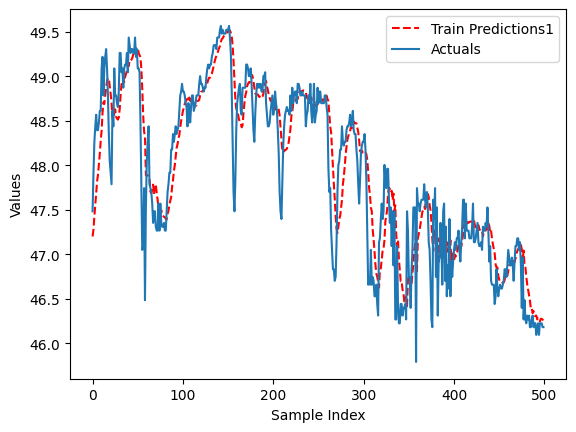

In [ ]:
# Assuming 'Train Predictions' and 'Actuals' are columns in the train_results DataFrame
plt.plot(train_results['Train Predictions1'][:500], label='Train Predictions1', linestyle='--', color='red')
plt.plot(train_results['Actuals'][:500], label='Actuals')

# Add labels and legend
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

# update model1

In [ ]:
# Assuming you have already defined model1 up to this point
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, InputLayer

# Update the input layer with input shape (WINDOW_SIZE, X_train1.shape[1])
model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, X_train1.shape[1])))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 128)               38400     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 8)                 1032      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 39441 (154.07 KB)
Trainable params: 39441 (154.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.input_shape

(None, 10, 10)

In [ ]:
input_sequence.shape

(1, 10, 10)

In [ ]:

# Initialize an input sequence with the last WINDOW_SIZE values from your training data
input_sequence = []
input_sequence = X_train1[-WINDOW_SIZE:].reshape((1, WINDOW_SIZE, X_train1.shape[1]))

# Specify the number of steps to forecast (e.g., for one month ahead)
forecast_steps = 200

# Initialize a list to store the forecasted values
forecasted_values1 = []

# Loop to forecast each step
for _ in range(forecast_steps):
    # Use the trained model to predict the next value
    next_value = model1.predict(input_sequence).flatten()[0]

    # Append the predicted value to the forecasted_values list
    forecasted_values1.append(next_value)

    # Update the input_sequence for the next iteration
    input_sequence = np.roll(input_sequence, -1, axis=1)
    input_sequence[0, -1, 0] = next_value


# Display the forecasted values
forecasted_values1


1/1 [==============================] - 0s 28ms/step


[0.64010966,
 0.6889506,
 0.7612403,
 0.75527847,
 0.7393841,
 0.72234845,
 0.7028854,
 0.68239003,
 0.65834093,
 0.64382994,
 0.6327244,
 0.6326468,
 0.6327213,
 0.6334007,
 0.63367045,
 0.6350709,
 0.6333529,
 0.6327753,
 0.6327392,
 0.63244843,
 0.63334215,
 0.63280356,
 0.63208365,
 0.63267803,
 0.6329725,
 0.63444245,
 0.6328097,
 0.6323643,
 0.6325189,
 0.63235086,
 0.6333515,
 0.63280934,
 0.63208145,
 0.63267434,
 0.63296807,
 0.6344378,
 0.6328054,
 0.6323606,
 0.63251686,
 0.6323501,
 0.6333517,
 0.63280946,
 0.6320815,
 0.63267446,
 0.6329682,
 0.6344379,
 0.63280535,
 0.6323606,
 0.6325168,
 0.6323501,
 0.6333517,
 0.63280946,
 0.6320815,
 0.63267446,
 0.6329682,
 0.6344379,
 0.63280535,
 0.6323606,
 0.6325168,
 0.6323501,
 0.6333517,
 0.63280946,
 0.6320815,
 0.63267446,
 0.6329682,
 0.6344379,
 0.63280535,
 0.6323606,
 0.6325168,
 0.6323501,
 0.6333517,
 0.63280946,
 0.6320815,
 0.63267446,
 0.6329682,
 0.6344379,
 0.63280535,
 0.6323606,
 0.6325168,
 0.6323501,
 0.633351

In [ ]:
# Assuming mean and std are the mean and standard deviation from your training data
mean = X_train1.mean()
std = X_train1.std()

# Denormalize the forecasted values
denormalized_forecast = [(val * std) + mean for val in forecasted_values1]
denormalized_forecast

[49.533023183475876,
 49.69688343717946,
 49.939413770279025,
 49.919411946836455,
 49.86608674918526,
 49.80893248306702,
 49.743634347441784,
 49.67487289257795,
 49.594188692772526,
 49.54550465085829,
 49.508245822950514,
 49.50798545909298,
 49.508235424393995,
 49.51051470799475,
 49.51141978235666,
 49.51611833012674,
 49.51035433025762,
 49.50841659924417,
 49.50829541606624,
 49.507319951475566,
 49.510318335254276,
 49.50851138608631,
 49.50609612136181,
 49.50809024454717,
 49.50907810741677,
 49.51400982281963,
 49.508531983227115,
 49.507037590671544,
 49.5075563186642,
 49.50699259691736,
 49.51034973089608,
 49.508530783393674,
 49.506088722388895,
 49.508077846268236,
 49.509063309470946,
 49.51399422498485,
 49.508517585225775,
 49.50702519239261,
 49.50754951960801,
 49.506989997278225,
 49.510350330812805,
 49.50853118333815,
 49.50608892236114,
 49.50807824621272,
 49.50906370941543,
 49.51399462492933,
 49.50851738525354,
 49.50702519239261,
 49.50754931963577,
 49

# --format and load saved trained weights to model2

In [ ]:
# Create a sequential model
model2 = Sequential()

# Add an input layer with input shape (WINDOW_SIZE, X_train1.shape[1])
model2.add(InputLayer((WINDOW_SIZE, 1)))

# Add a bidirectional LSTM layer with 64 units
model2.add(Bidirectional(LSTM(32)))

# Add a Dense layer with 8 units and ReLU activation
model2.add(Dense(8, activation='relu'))

# Add a Dense layer with 1 unit and linear activation (no activation function)
model2.add(Dense(1, activation='linear'))
model2.load_weights('my_model2.weights')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 64)                8704      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9233 (36.07 KB)
Trainable params: 9233 (36.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_predictions2 = []
train_predictions2 = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions2':train_predictions, 'Actuals':y_train1})
train_results

6250/6250 [==============================] - 19s 3ms/step


,Train Predictions2,Actuals
0,47.199471,47.48264
1,47.278496,47.91666
2,47.427124,48.26389
3,47.551682,48.43750
4,47.687103,48.56771
...,...,...
199995,50.032043,50.00000
199996,50.023888,50.00000
199997,50.015488,50.00000
199998,50.006882,50.00000


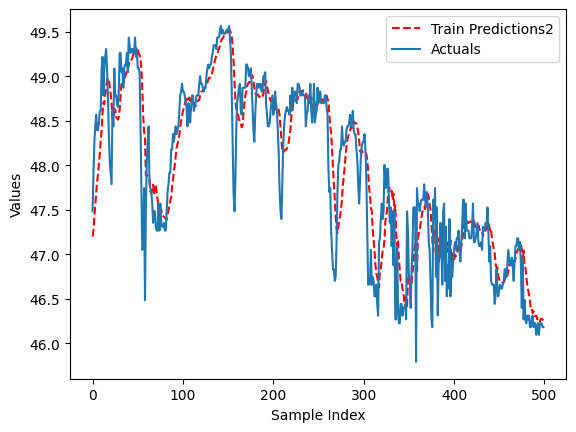

In [ ]:
# Assuming 'Train Predictions' and 'Actuals' are columns in the train_results DataFrame
plt.plot(train_results['Train Predictions2'][:500], label='Train Predictions2', linestyle='--', color='red')
plt.plot(train_results['Actuals'][:500], label='Actuals')

# Add labels and legend
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Plot the original data
#df['sensor_01'].plot(label='Actual sensor_01')
df[y_train1].plot(label='Actual sensor_01')

# Plot the predictions
plt.plot(train_results.index, train_results['Train Predictions'], label='Train Predictions', linestyle='--', color='red')

# Customize the plot
plt.title('Daily sensor_01 with Predictions')
plt.xlabel('DateTime')
plt.ylabel('sensor_01')
plt.legend()
plt.show()

In [ ]:
# Plot the predictions
plt.plot(train_results.index, train_results['Train Predictions'], label='Train Predictions', linestyle='--', color='red')

# Customize the plot
plt.title('Daily sensor_01 with Predictions')
plt.xlabel('DateTime')
plt.ylabel('sensor_01')
plt.legend()
plt.show()

In [ ]:
print(X_train1[-WINDOW_SIZE:].shape)

(10, 10)


In [ ]:
print(model2.input_shape)

(None, 10, 1)


In [ ]:
# Assuming you have already defined model2 up to this point
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, InputLayer

# Update the input layer with input shape (WINDOW_SIZE, X_train1.shape[1])
model2 = Sequential()
model2.add(InputLayer(input_shape=(WINDOW_SIZE, X_train1.shape[1])))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 128)               38400     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 8)                 1032      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 39441 (154.07 KB)
Trainable params: 39441 (154.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Initialize an input sequence with the last WINDOW_SIZE values from your training data
input_sequence = 0
input_sequence = X_train1[-WINDOW_SIZE:].reshape((1, WINDOW_SIZE, X_train1.shape[1]))

# Specify the number of steps to forecast (e.g., for one month ahead)
forecast_steps = 200

# Initialize a list to store the forecasted values
forecasted_values2 = []

# Loop to forecast each step
for _ in range(forecast_steps):
    # Use the trained model to predict the next value
    next_value = model2.predict(input_sequence).flatten()[0]

    # Append the predicted value to the forecasted_values list
    forecasted_values2.append(next_value)

    # Update the input_sequence for the next iteration
    input_sequence = np.roll(input_sequence, -1, axis=1)
    input_sequence[0, -1, 0] = next_value


# Display the forecasted values
forecasted_values2


1/1 [==============================] - 0s 24ms/step


[0.26734677,
 0.27402446,
 0.2788387,
 0.32932678,
 0.42753336,
 0.44786817,
 0.45341748,
 0.44925135,
 0.43834502,
 0.41876686,
 0.48996824,
 0.4902645,
 0.4902881,
 0.48988116,
 0.48955655,
 0.489239,
 0.48905325,
 0.48899138,
 0.48913786,
 0.48943156,
 0.4891411,
 0.4894427,
 0.4895022,
 0.48928517,
 0.48931128,
 0.48907155,
 0.48891228,
 0.48884314,
 0.4889583,
 0.48918396,
 0.4891442,
 0.48944587,
 0.48950508,
 0.48928738,
 0.48931217,
 0.48907226,
 0.4889128,
 0.48884368,
 0.4889589,
 0.4891849,
 0.4891442,
 0.48944587,
 0.48950505,
 0.48928732,
 0.48931223,
 0.4890722,
 0.48891276,
 0.48884368,
 0.4889589,
 0.48918486,
 0.4891442,
 0.48944587,
 0.48950505,
 0.48928732,
 0.48931223,
 0.4890722,
 0.48891276,
 0.48884368,
 0.4889589,
 0.48918486,
 0.4891442,
 0.48944587,
 0.48950505,
 0.48928732,
 0.48931223,
 0.4890722,
 0.48891276,
 0.48884368,
 0.4889589,
 0.48918486,
 0.4891442,
 0.48944587,
 0.48950505,
 0.48928732,
 0.48931223,
 0.4890722,
 0.48891276,
 0.48884368,
 0.4889589

In [ ]:
# Assuming mean and std are the mean and standard deviation from your training data
mean = X_train1.mean()
std = X_train1.std()

# Denormalize the forecasted values
denormalized_forecast2 = [(val * std) + mean for val in forecasted_values]
denormalized_forecast2

[45.66312195040421,
 46.83250556802276,
 46.97837374493037,
 46.136775416218555,
 46.03959857183141,
 45.99564843830404,
 45.997359194382,
 45.99240720044435,
 45.98508644424819,
 45.982685286608664,
 45.985073946030205,
 45.98297114585045,
 45.98314432115887,
 45.98328120164225,
 45.98199348524669,
 45.98481398309609,
 45.98277517379242,
 45.983050834488324,
 45.983258404892645,
 45.98198448652974,
 45.98481028362357,
 45.98277277413457,
 45.98304993461663,
 45.9832583049069,
 45.981983886615275,
 45.98480988368059,
 45.982772874120315,
 45.98304993461663,
 45.9832583049069,
 45.981983886615275,
 45.98480988368059,
 45.982772874120315,
 45.98304993461663,
 45.9832583049069,
 45.981983886615275,
 45.98480988368059,
 45.982772874120315,
 45.98304993461663,
 45.9832583049069,
 45.981983886615275,
 45.98480988368059,
 45.982772874120315,
 45.98304993461663,
 45.9832583049069,
 45.981983886615275,
 45.98480988368059,
 45.982772874120315,
 45.98304993461663,
 45.9832583049069,
 45.981983886

# Forecasting